# Bank Customer Satisfaction Project 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href='#eda'>Exploration</a></li>
<li><a href='#ann'>Arificial Neural Networks</a></li>
<li><a href='#conclusion'>Conclusion</a></li>
</ul>

<a id='intro'></a>
<p><h3> Introduction</h3></p>
>**Dataset** This dataset has information about customers of a bank for a period of 6 months. It has information about the customers who exited vs customers who stayed during the observation period. The aim of the project is to predict who will exit the bank in future.<br>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset= pd.read_csv('C:/Users/rchak/Desktop/Churn_Modelling.csv')



In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a id='eda'></a>
<p><h3>Exploratory Data Analysis</h3></p>
> Lets explore the data and try to find any interesting patterns

In [4]:
country_count=dataset['Geography'].value_counts()

In [5]:
country_count

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
ds=dataset[dataset['Exited']==1]

In [7]:
country_exited=ds['Geography'].value_counts()

In [8]:
percent_france_exit=(country_exited['France']/country_count['France'])*100
percent_germany_exit=(country_exited['Germany']/country_count['Germany'])*100
percent_spain_exit=(country_exited['Spain']/country_count['Spain'])*100
print(percent_france_exit,percent_germany_exit,percent_spain_exit)

16.1547666534 32.4432044639 16.6733952362


In [9]:
exit=pd.DataFrame(
data={'% exited':[percent_france_exit,percent_germany_exit,percent_spain_exit]
    
},
index=['France','Germany','Spain'])

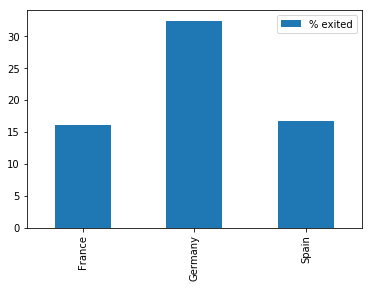

In [10]:
exit.plot(kind='bar')
plt.show()

> We can clearly see that, Germany has double the exit rates compared to France and Spain

>**Pearson's R corelation Matrix**:The Pearson product-moment correlation coefficient is a measure of the strength of the linear relationship between two variables. With value ranging from 1 to -1, 1 mean absolute positve co relation, -1 means absolute neagtive co relation and 0 means no co relation

> Lets find the co-relation between exiting the bank among the features given in the dataset

In [11]:
corelation_matrix=dataset.corr()

In [12]:
corelation_matrix['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

> There is no considerable positive or negative co-relation as most of the values are close to zero

>More exploration

C:\Users\rchak\Anaconda2\envs\python3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


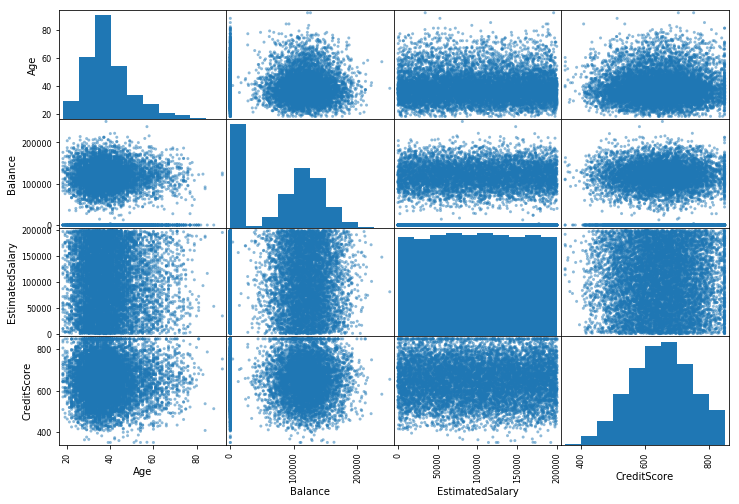

In [13]:
from pandas.tools.plotting import scatter_matrix
attributes=['Age','Balance','EstimatedSalary','CreditScore']
scatter_matrix(dataset[attributes], figsize=(12,8))
plt.show()

>**Model Selection** With exploratory data analysis we can see that there is not much corelation among features provided, therefore a deep learning model is a good choice to fit this dataset to predict future behaviour.<br><br>

>Lets create an Artificial Neural Net and try and predict the future behaviour of the customer

<a id='ann'></a>
<p><h3>Artificial Neural Network</h3></p>

>x= contains the feature which will have an impact on customer behaviour. For instance customer name, id are excluded because those feature dosen't have an impact on customer behaviour<br><br>
>y= contains the behaviour we want to predict, where 1 means the customer has exited the bank and 0 means the customer stays

In [14]:
x=dataset.iloc[:, 3:13].values
y=dataset.iloc[:,-1].values
 
# Label encoder is used to encode the Gender into number 0 means female and 1 means male
# One hot encoding is used to represt the countries in terms of 0 and 1
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
lencoder=LabelEncoder()
x[:,2]=lencoder.fit_transform(x[:,2])
l_encoder=LabelEncoder()
x[:,1]=l_encoder.fit_transform(x[:,1])
onehot=OneHotEncoder(categorical_features=[1])
x=onehot.fit_transform(x).toarray()
x=x[:, 1:]

In [15]:
#splititng the training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [16]:
# scaling the numbers so that it is suitable to run artificial neural net
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.transform(x_test)

In [17]:
# Artificial Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()
classifier.add(Dense(output_dim=6,input_dim=11,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

classifier.fit(x_train,y_train,batch_size=10,nb_epoch=100)

Using TensorFlow backend.
C:\Users\rchak\Anaconda2\envs\python3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=11, activation="relu", units=6, kernel_initializer="uniform")`
C:\Users\rchak\Anaconda2\envs\python3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
C:\Users\rchak\Anaconda2\envs\python3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
C:\Users\rchak\Anaconda2\envs\python3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
8000/8000 [==============================] - 2s 195us/step - loss: 0.4963 - acc: 0.7952
Epoch 2/100
8000/8000 [==============================] - 1s 128us/step - loss: 0.4286 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 128us/step - loss: 0.4230 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 127us/step - loss: 0.4184 - acc: 0.8146
Epoch 5/100
8000/8000 [==============================] - 1s 172us/step - loss: 0.4161 - acc: 0.8286
Epoch 6/100
8000/8000 [==============================] - 1s 187us/step - loss: 0.4138 - acc: 0.8305
Epoch 7/100
8000/8000 [==============================] - 1s 159us/step - loss: 0.4124 - acc: 0.8326
Epoch 8/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.4113 - acc: 0.8330
Epoch 9/100
8000/8000 [==============================] - 1s 161us/step - loss: 0.4095 - acc: 0.8339
Epoch 10/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.4091 - acc: 0.8350

In [18]:
# predicting with the help of test set
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

#confusion matrix to acces performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1541   54]
 [ 259  146]]


> From the confusion, we can see that out of 2000 test data, out neural net predicts correctly for 1541+146= 1719 values, which gives accuracy = 1719/2000 = 84.35%

<a id='conclusion'></a>
<p><h3>Conclusion</h3></p>

> So what does that 84.35 % accuracy means from a bussiness prespective. Lets solve a real world problem using this model. Lets predict whether a customer with following feature will leave the bank or stay in the bank<br><br>
>Geography: France<br>
>Credit Score: 600<br>
>Gender: Male<br>
>Age: 40 years old<br>
>Tenure: 3 years<br>
>Balance: 60000<br>
>Number of Products: 2<br>
>Does this customer have a credit card ? Yes<br>
>Is this customer an Active Member: Yes<br>
>Estimated Salary: 50000<br>



In [19]:
sample=np.array([[0,0,600,1,40,3,60000,2,1,1,50000]])

sample=scaling.transform(sample)  #transforming with respect to the scaling performed on the test set
sample_predict=classifier.predict(sample)
sam_prob=(sample_predict>0.5)      # MORE THAN 0.5 = 1 WHICH means the customer exits

C:\Users\rchak\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
sam_prob

array([[False]], dtype=bool)

>sam_prob= FALSE whic means the customer is not leaving the bank, and this prediction has an accuracy of 86% <br>
>Thus, the business problem is solved, if someone from the bank management wants to know whether the customer is likely to leave we can plug in the numbers and say the result with an 84.35 % accuracy

>The accuracy of the model tends to change every time is is run, because of random initialization. So let perform k folds cross validation with to determine the averay accuray over a number of folds, here it is 10

k-fold cross validation

In [21]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
def build_classifier():
    classifier=Sequential()
    classifier.add(Dense(output_dim=6,input_dim=11,init='uniform',activation='relu'))
    classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))
    classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier
classifier=KerasClassifier(build_fn= build_classifier, batch_size=10, nb_epoch=10)
    

In [22]:
accuracies=cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10, n_jobs= -1)

In [24]:
sum(accuracies)/len(accuracies)
    

84.015

> The average accuracy of the model is 84.015%